In [1]:
import tensorflow as tf
import numpy as np

In [2]:
max_features = 20000
embedding_len = 128
sequence_length = 500

# 1. Data

In [3]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.imdb.load_data(num_words=max_features)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=sequence_length)
x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=sequence_length)

17464789/17464789 [==============================] - 2s 0us/step


# 2. Model 1: CNN

In [7]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")

x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Flatten()(x)
dense1 = tf.keras.layers.Dense(128, activation="relu")(x)
dense2 = tf.keras.layers.Dense(128, activation="relu")(dense1)
predictions = tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")(dense2)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 128)          49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 128)         0         
 )                                                               
                                                                 
 conv1d_5 (Conv1D)           (None, 250, 128)          49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 125, 128)         0         
 1D)                                                       

## Training

In [8]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
391/391 [==============================] - 62s 152ms/step - loss: 0.4486 - accuracy: 0.7384 - val_loss: 0.2758 - val_accuracy: 0.8856
Epoch 2/10
391/391 [==============================] - 37s 93ms/step - loss: 0.1683 - accuracy: 0.9383 - val_loss: 0.2800 - val_accuracy: 0.8900
Epoch 3/10
391/391 [==============================] - 25s 63ms/step - loss: 0.0742 - accuracy: 0.9751 - val_loss: 0.3986 - val_accuracy: 0.8751
Epoch 4/10
391/391 [==============================] - 19s 49ms/step - loss: 0.0386 - accuracy: 0.9868 - val_loss: 0.4842 - val_accuracy: 0.8622
Epoch 5/10
391/391 [==============================] - 19s 48ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.6109 - val_accuracy: 0.8584
Epoch 6/10
391/391 [==============================] - 14s 37ms/step - loss: 0.0142 - accuracy: 0.9947 - val_loss: 0.7256 - val_accuracy: 0.8638
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.8417 - val_accuracy

<Figure size 1000x1000 with 0 Axes>

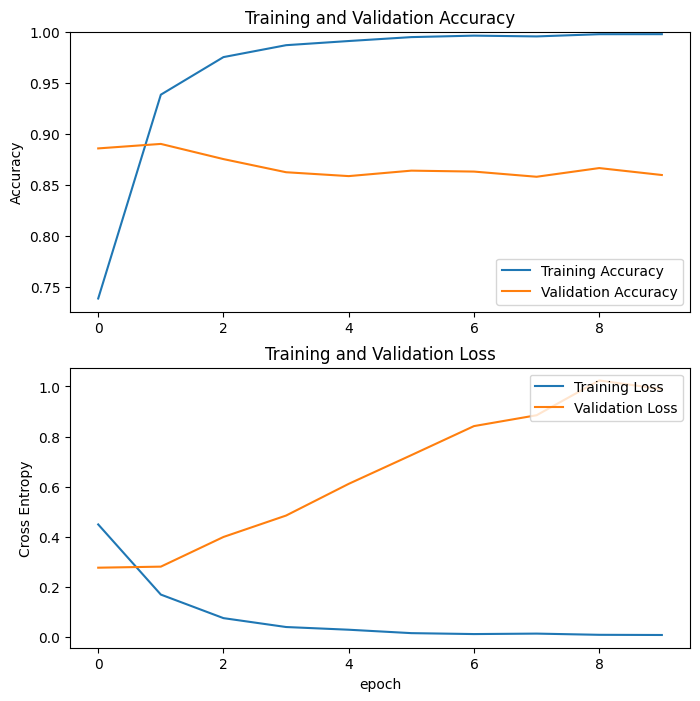

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 3. Model 2: CNN

In [10]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")

x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)
x = tf.keras.layers.Conv1D(128, 5, padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(5)(x)
x = tf.keras.layers.Conv1D(128, 5, padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(5)(x)
x = tf.keras.layers.Conv1D(128, 5, padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(5)(x)
x = tf.keras.layers.Flatten()(x)
dense1 = tf.keras.layers.Dense(128, activation="relu")(x)
predictions = tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")(dense1)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 conv1d_7 (Conv1D)           (None, 496, 128)          82048     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 99, 128)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 95, 128)           82048     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 19, 128)          0         
 1D)                                                       

In [13]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
391/391 [==============================] - 54s 130ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 1.0348 - val_accuracy: 0.8601
Epoch 2/30
391/391 [==============================] - 34s 88ms/step - loss: 2.4349e-04 - accuracy: 1.0000 - val_loss: 1.4546 - val_accuracy: 0.8599
Epoch 3/30
391/391 [==============================] - 25s 63ms/step - loss: 5.9983e-06 - accuracy: 1.0000 - val_loss: 1.7898 - val_accuracy: 0.8614
Epoch 4/30
391/391 [==============================] - 18s 45ms/step - loss: 1.0278e-06 - accuracy: 1.0000 - val_loss: 1.9211 - val_accuracy: 0.8606
Epoch 5/30
391/391 [==============================] - 14s 35ms/step - loss: 4.9902e-07 - accuracy: 1.0000 - val_loss: 2.0017 - val_accuracy: 0.8608
Epoch 6/30
391/391 [==============================] - 10s 26ms/step - loss: 3.0658e-07 - accuracy: 1.0000 - val_loss: 2.0600 - val_accuracy: 0.8607
Epoch 7/30
391/391 [==============================] - 11s 29ms/step - loss: 2.0727e-07 - accuracy: 1.0000 - val_los

<Figure size 1000x1000 with 0 Axes>

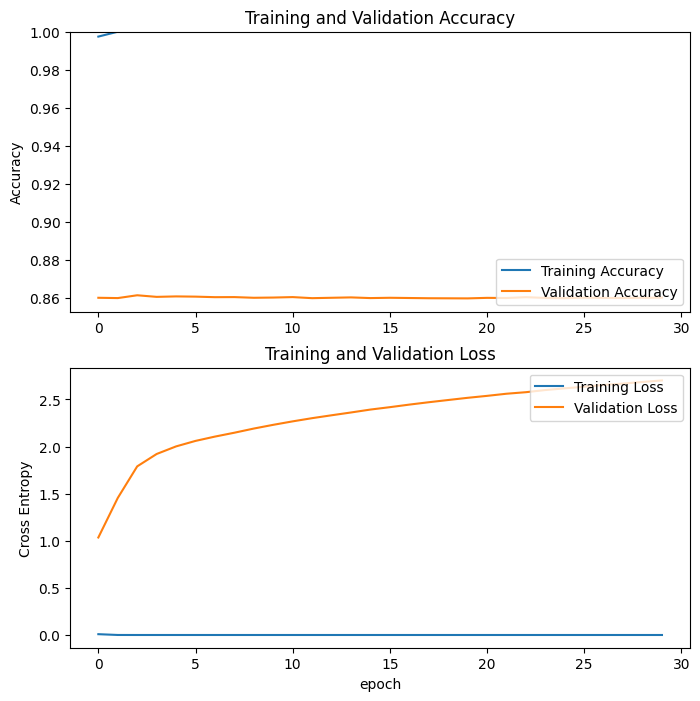

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# 4. Model 3: CNN

In [15]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")

x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)
x = tf.keras.layers.Conv1D(128, 3, padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(128, 3, padding="valid", activation="relu")(x)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Flatten()(x)
dense1 = tf.keras.layers.Dense(128, activation="relu")(x)
dense2 = tf.keras.layers.Dense(64, activation="relu")(dense1)
predictions = tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")(dense1)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 conv1d_10 (Conv1D)          (None, 498, 128)          49280     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 249, 128)         0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 247, 128)          49280     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 123, 128)         0         
 1D)                                                       

In [16]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
391/391 [==============================] - 59s 144ms/step - loss: 0.3786 - accuracy: 0.8101 - val_loss: 0.2819 - val_accuracy: 0.8833
Epoch 2/30
391/391 [==============================] - 34s 87ms/step - loss: 0.1547 - accuracy: 0.9439 - val_loss: 0.3594 - val_accuracy: 0.8580
Epoch 3/30
391/391 [==============================] - 25s 65ms/step - loss: 0.0648 - accuracy: 0.9778 - val_loss: 0.5028 - val_accuracy: 0.8412
Epoch 4/30
391/391 [==============================] - 22s 57ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.6125 - val_accuracy: 0.8558
Epoch 5/30
391/391 [==============================] - 15s 39ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.7405 - val_accuracy: 0.8536
Epoch 6/30
391/391 [==============================] - 13s 33ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.6981 - val_accuracy: 0.8592
Epoch 7/30
391/391 [==============================] - 12s 31ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.7490 - val_accuracy

<Figure size 1000x1000 with 0 Axes>

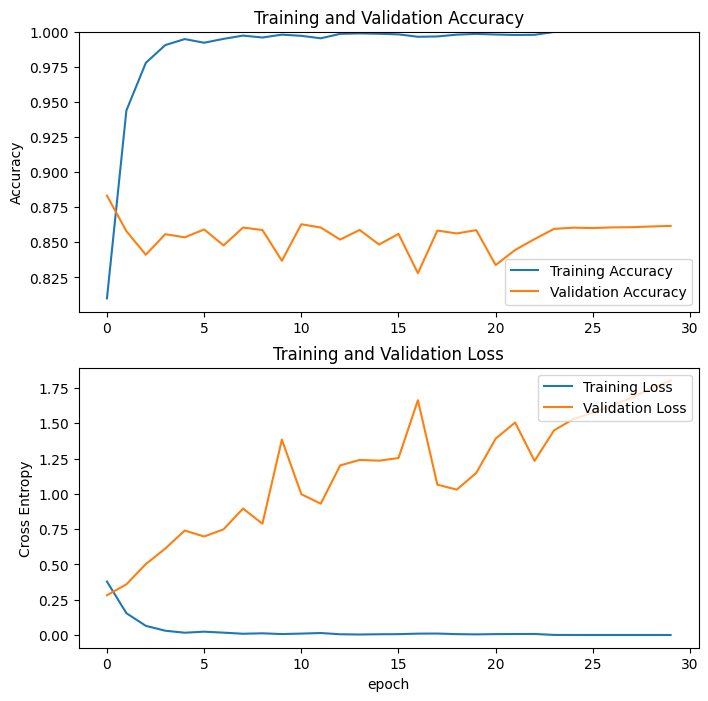

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()